# Python introduction - session 3 
## Learning about the real power of python with modules making use of other peoples work

If you get stuck in an endless loop hit the **"STOP" button (black square)** above or our good friend from bash, **ctrl+c**  
You know you are stuck in a loop if you see **In \[\*\]:** forever

### Installation reminder

If you want to install this whole tool stack on your own machine we recommend the following.

#### Windows

* Install the [Ubuntu subsystem](https://docs.microsoft.com/en-us/windows/wsl/install-win10)
* Install the Linux version of [Anaconda](https://www.anaconda.com/products/individual) into your subsystem.
* Setup [Bioconda](https://bioconda.github.io/) in your subsystem
* Install programs and modules like...

``conda install biopython``

#### Mac

* Install the Mac version of [Anaconda](https://www.anaconda.com/products/individual) on your command line/terminal.
* Setup [Bioconda](https://bioconda.github.io/) on your command line/terminal.
* Install programs and modules like...

``conda install biopython``

### Objectives

* Understand what python object is
* Understand what a module is
* Build your DNA/Protein sequencing object
* Apply biopython to the Arabidopsis genome
* Apply certain biopython functions on the Arabpidosis genome to learn something about biology

## It's all a bit like cats and dogs.

### Exercise I

* Imagine a dog
* Find a picutre of it on the internet
* Post it in slack


In [1]:
%matplotlib inline
from IPython.display import Image

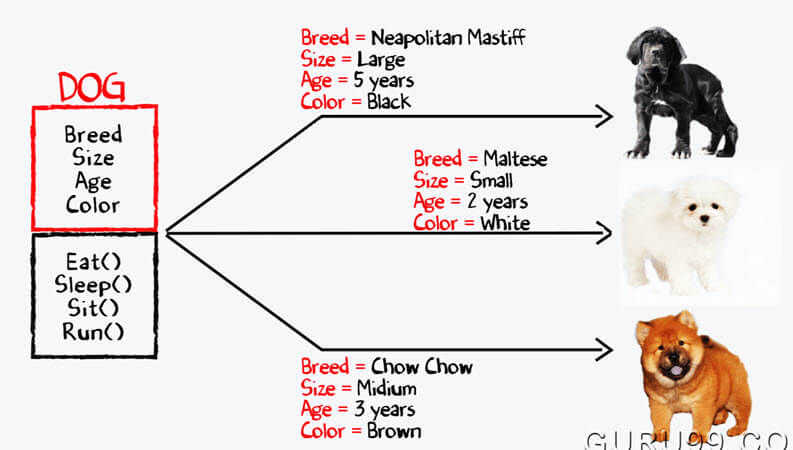

In [2]:
Image(filename='./figures/dogs_as_objects.jpg')

### Intro to [Biopython](https://biopython.org/wiki/Documentation)

* We will download the complete [Arabidopsis](https://www.arabidopsis.org/index.jsp) coding sequences.
* We will read them all in at once.
* We will translate them all into protein sequences.
* We will calcualte their pi values.
* We will do some basic plotting.

#### Let's download sequences from [here](https://www.arabidopsis.org/download/index-auto.jsp?dir=%2Fdownload_files%2FGenes%2FAraport11_genome_release%2FAraport11_blastsets)

In [3]:
!wget https://www.arabidopsis.org/download_files/Genes/Araport11_genome_release/Araport11_blastsets/Araport11_genes.201606.cds.fasta.gz

--2021-06-26 20:40:38--  https://www.arabidopsis.org/download_files/Genes/Araport11_genome_release/Araport11_blastsets/Araport11_genes.201606.cds.fasta.gz
Resolving www.arabidopsis.org (www.arabidopsis.org)... 52.88.10.157
Connecting to www.arabidopsis.org (www.arabidopsis.org)|52.88.10.157|:443... connected.
HTTP request sent, awaiting response... 200 OK
Syntax error in Set-Cookie: JSESSIONID=F6B4C0512998DB437C5283614D4B0C6A; Expires=Sat, 26-Jun-2021 20:40:39 GMT; Path=/; HttpOnly, Secure at position 91.
Length: 13513961 (13M) [application/x-gzip]
Saving to: ‘Araport11_genes.201606.cds.fasta.gz’

Araport11_genes.201 100%[===================>]  12.89M  3.75MB/s    in 3.4s    

2021-06-26 20:40:42 (3.75 MB/s) - ‘Araport11_genes.201606.cds.fasta.gz’ saved [13513961/13513961]



In [4]:
!gunzip Araport11_genes.201606.cds.fasta.gz

In [5]:
!head Araport11_genes.201606.cds.fasta

>AT1G01010.1 | NAC domain containing protein 1 | Chr1:3760-5630 FORWARD LENGTH=1290 | 201606
ATGGAGGATCAAGTTGGGTTTGGGTTCCGTCCGAACGACGAGGAGCTCGTTGGTCACTAT
CTCCGTAACAAAATCGAAGGAAACACTAGCCGCGACGTTGAAGTAGCCATCAGCGAGGTC
AACATCTGTAGCTACGATCCTTGGAACTTGCGCTTCCAGTCAAAGTACAAATCGAGAGAT
GCTATGTGGTACTTCTTCTCTCGTAGAGAAAACAACAAAGGGAATCGACAGAGCAGGACA
ACGGTTTCTGGTAAATGGAAGCTTACCGGAGAATCTGTTGAGGTCAAGGACCAGTGGGGA
TTTTGTAGTGAGGGCTTTCGTGGTAAGATTGGTCATAAAAGGGTTTTGGTGTTCCTCGAT
GGAAGATACCCTGACAAAACCAAATCTGATTGGGTTATCCACGAGTTCCACTACGACCTC
TTACCAGAACATCAGAGGACATATGTCATCTGCAGACTTGAGTACAAGGGTGATGATGCG
GACATTCTATCTGCTTATGCAATAGATCCCACTCCCGCTTTTGTCCCCAATATGACTAGT


#### Le'ts load a tool set from the Biopython toolkit starting with [SeqIO](https://biopython.org/wiki/SeqRecord)

We will use this to store all CDS sequences into a list and to explore the sequence object abit more.

In [6]:
from Bio import SeqIO

In [7]:
?SeqIO

In [9]:
filename = 'Araport11_genes.201606.cds.fasta'

In [10]:
arabidopsis_cds = []
for seq in SeqIO.parse(filename, 'fasta'):
    arabidopsis_cds.append(seq)
    

In [11]:
arabidopsis_cds

[SeqRecord(seq=Seq('ATGGAGGATCAAGTTGGGTTTGGGTTCCGTCCGAACGACGAGGAGCTCGTTGGT...TAA'), id='AT1G01010.1', name='AT1G01010.1', description='AT1G01010.1 | NAC domain containing protein 1 | Chr1:3760-5630 FORWARD LENGTH=1290 | 201606', dbxrefs=[]),
 SeqRecord(seq=Seq('ATGGCGGCGAGTGAACACAGATGCGTGGGATGTGGTTTTAGGGTAAAGTCATTG...TGA'), id='AT1G01020.1', name='AT1G01020.1', description='AT1G01020.1 | ARV1 family protein | Chr1:6915-8666 REVERSE LENGTH=738 | 201606', dbxrefs=[]),
 SeqRecord(seq=Seq('ATGGCGGCGAGTGAACACAGATGCGTGGGATGTGGTTTTAGGGTAAAGTCATTG...TAA'), id='AT1G01020.2', name='AT1G01020.2', description='AT1G01020.2 | ARV1 family protein | Chr1:7315-8666 REVERSE LENGTH=576 | 201606', dbxrefs=[]),
 SeqRecord(seq=Seq('ATGAGTACATCGAGTGTGAACGCATGGTCTGTTTTAATCACTTTCTTTCCCTTT...TGA'), id='AT1G01020.3', name='AT1G01020.3', description='AT1G01020.3 | ARV1 family protein | Chr1:6915-8442 REVERSE LENGTH=711 | 201606', dbxrefs=[]),
 SeqRecord(seq=Seq('ATGAGTACATCGAGTGTGAACGCATGGTCTGTTTTAATCACTTTCTTTCCC

### Exercise II

* Store the 3 sequence in a variable with the name third_cds

In [12]:
third_cds = arabidopsis_cds[2]

In [13]:
third_cds

SeqRecord(seq=Seq('ATGGCGGCGAGTGAACACAGATGCGTGGGATGTGGTTTTAGGGTAAAGTCATTG...TAA'), id='AT1G01020.2', name='AT1G01020.2', description='AT1G01020.2 | ARV1 family protein | Chr1:7315-8666 REVERSE LENGTH=576 | 201606', dbxrefs=[])

### ...it's like a sequence dog....

A SeqRecord has several attributes such as

* a sequence -> access with .seq
* an id -> access with .id
* a name -> access with .name
* a description -> access with .description

... and many more as described here [SeqRecord](https://biopython.org/wiki/SeqRecord)

In [14]:
third_cds

SeqRecord(seq=Seq('ATGGCGGCGAGTGAACACAGATGCGTGGGATGTGGTTTTAGGGTAAAGTCATTG...TAA'), id='AT1G01020.2', name='AT1G01020.2', description='AT1G01020.2 | ARV1 family protein | Chr1:7315-8666 REVERSE LENGTH=576 | 201606', dbxrefs=[])

In [15]:
print(third_cds)

ID: AT1G01020.2
Name: AT1G01020.2
Description: AT1G01020.2 | ARV1 family protein | Chr1:7315-8666 REVERSE LENGTH=576 | 201606
Number of features: 0
Seq('ATGGCGGCGAGTGAACACAGATGCGTGGGATGTGGTTTTAGGGTAAAGTCATTG...TAA')


In [16]:
dir(third_cds)

['__add__',
 '__bool__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__le___',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_per_letter_annotations',
 '_seq',
 '_set_per_letter_annotations',
 '_set_seq',
 'annotations',
 'dbxrefs',
 'description',
 'features',
 'format',
 'id',
 'letter_annotations',
 'lower',
 'name',
 'reverse_complement',
 'seq',
 'translate',
 'upper']

### Let's access the different 'characteristics' (called attributes) of our SeqRecord

In [17]:
###the sequence
third_cds.seq

Seq('ATGGCGGCGAGTGAACACAGATGCGTGGGATGTGGTTTTAGGGTAAAGTCATTG...TAA')

In [18]:
print(third_cds.seq)

ATGGCGGCGAGTGAACACAGATGCGTGGGATGTGGTTTTAGGGTAAAGTCATTGTTCATTCAATACTCTCCGGGTAACATTCGTCTCATGAAATGCGGAAATTGCAAGGAAGTAGCAGATGAGTACATCGAGTGTGAACGCATGATTATTTTCATCGATTTAATCCTTCACAGACCAAAGGTATATAGACACGTCCTCTACAATGCAATTAATCCAGCAACTGTCAATATTCAGCATCTGTTGTGGAAGTTGGTCTTCGCCTATCTTCTTCTAGACTGTTATAGAAGCTTGCTACTGAGAAAAAGTGATGAAGAATCGAGCTTTTCTGATAGCCCTGTTCTTCTATCTATAAAGGTTCTGATTGGTGTCTTATCTGCAAACGCTGCATTTATCATCTCTTTTGCCATTGCGACTAAGGGTTTGCTAAATGAAGTTTCCAGAAGAAGAGAGATTATGTTGGGGATATTCATCTCTAGTTACTTCAAGATATTTCTGCTTGCGATGTTGGTATGTTGTAGCTTTACCTCTCACTTAATTCCTAATATTGAAGTTCCAAACTTCTTAAGCATTCCATAA


In [19]:
###the id
third_cds.id

'AT1G01020.2'

In [20]:
###the description
third_cds.description

'AT1G01020.2 | ARV1 family protein | Chr1:7315-8666 REVERSE LENGTH=576 | 201606'

In [21]:
####reverse complement
third_cds.reverse_complement()

SeqRecord(seq=Seq('TTATGGAATGCTTAAGAAGTTTGGAACTTCAATATTAGGAATTAAGTGAGAGGT...CAT'), id='<unknown id>', name='<unknown name>', description='<unknown description>', dbxrefs=[])

...it's like a sequnce dog...

### Exercise III

* How long is the sequence of the third_cds

In [22]:
print('The lengths of the third cds is ', len(third_cds.seq), '.', sep='')

The lengths of the third cds is 576.


### Exercise  IV

* now let's make a length dictionary stores the length of all CDS in a dictionary.
* The keys of the dictionary will be the sequence ids and the vaules the lengths.
* BONUS. Print the name of the longest cds sequence.

In [23]:
###Faded example
cds_length_dict = {}
for seq in arabidopsis_cds:
    cds_length_dict[seq.id] = len(seq.seq)

In [24]:
max_length = max(cds_length_dict.values())

In [25]:
for _id, length in cds_length_dict.items():
    if length == max_length:
        print("This is one of the longest Arabidopsis CDS sequences:", _id)
        print("It is this many bases long:", length)

This is one of the longest Arabidopsis CDS sequences: AT1G67120.2
It is this many bases long: 16203


### Exercise  V

* now let's make a list that stores the length of all CDS in order (sic!).


In [26]:
###Let's make a cds lenght list as well for later.
###Faded example
cds_length = []
for seq in arabidopsis_cds:
    cds_length.append(len(seq.seq))

### Let's translate all the sequences and store them as protein sequences

We will use the [Seq](https://biopython.org/wiki/Seq) and [SeqRecord](https://biopython.org/wiki/SeqRecord) objects as a container to store these protein sequences.

...it's like a protein sequence dog...

In [27]:
from Bio import SeqRecord, Seq

In [28]:
third_cds.seq

Seq('ATGGCGGCGAGTGAACACAGATGCGTGGGATGTGGTTTTAGGGTAAAGTCATTG...TAA')

Because we know that the third_cds sequence is a DNA sequence we know we can translate it.

In [29]:
####translate
third_cds.seq.translate()

Seq('MAASEHRCVGCGFRVKSLFIQYSPGNIRLMKCGNCKEVADEYIECERMIIFIDL...IP*')

In [30]:
###let's make a protein record for the third cds
third_protein = SeqRecord.SeqRecord(seq=third_cds.seq.translate())

In [31]:
print(third_protein)

ID: <unknown id>
Name: <unknown name>
Description: <unknown description>
Number of features: 0
Seq('MAASEHRCVGCGFRVKSLFIQYSPGNIRLMKCGNCKEVADEYIECERMIIFIDL...IP*')


In [32]:
third_protein.id = third_cds.id
third_protein.name = third_cds.name
third_protein.description = third_cds.description

In [33]:
print(third_protein)

ID: AT1G01020.2
Name: AT1G01020.2
Description: AT1G01020.2 | ARV1 family protein | Chr1:7315-8666 REVERSE LENGTH=576 | 201606
Number of features: 0
Seq('MAASEHRCVGCGFRVKSLFIQYSPGNIRLMKCGNCKEVADEYIECERMIIFIDL...IP*')


### Exercise IV

Let's make a list of all Arabidopsis protein sequences

In [34]:
#### Faded example
arabidopsis_proteins = []
protein_length = []

for cds in arabidopsis_cds:
    tmp_protein = SeqRecord.SeqRecord(cds.seq.translate())
    tmp_protein.id = cds.id
    tmp_protein.name = cds.name
    tmp_protein.description = cds.description
    arabidopsis_proteins.append(tmp_protein)
    protein_length.append(len(tmp_protein.seq))

/Users/mcdonamc/opt/anaconda3/lib/python3.8/site-packages/Bio/Seq.py:2979: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


In [35]:
###Quick checks are good
len(arabidopsis_proteins) == len(arabidopsis_cds)

True

### Let's see if there is a correlation between 

Some people find python plotting a bit awkward and it is still good to know the basics.

The basic python plotting is [Matplotlib](https://matplotlib.org/) and [Seaborn](https://seaborn.pydata.org/). More advanced for interactive figures and such is [Altair](https://altair-viz.github.io/) which is up and coming.

For now some starting plots in matplotlib

In [36]:
import matplotlib.pyplot as plt

In [37]:
?plt.scatter

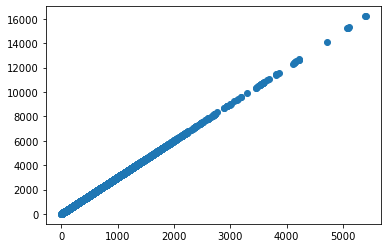

In [38]:
plt.scatter(protein_length, cds_length)

Text(0.5, 0, 'Protein Length [aa]')

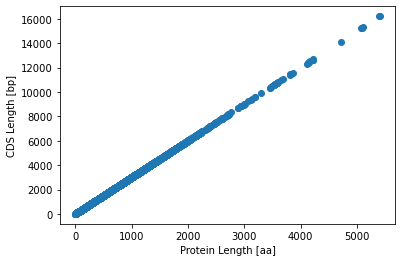

In [39]:
plt.scatter(protein_length, cds_length)
plt.ylabel('CDS Length [bp]')
plt.xlabel('Protein Length [aa]')

(array([3.6167e+04, 1.0268e+04, 1.4240e+03, 3.5000e+02, 8.3000e+01,
        2.6000e+01, 2.1000e+01, 1.3000e+01, 1.0000e+00, 6.0000e+00]),
 array([1.000e+00, 5.410e+02, 1.081e+03, 1.621e+03, 2.161e+03, 2.701e+03,
        3.241e+03, 3.781e+03, 4.321e+03, 4.861e+03, 5.401e+03]),
 <BarContainer object of 10 artists>)

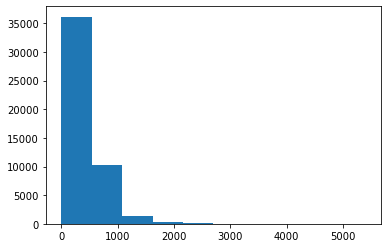

In [40]:
plt.hist(protein_length)

(array([1.500e+01, 1.600e+01, 5.900e+01, 1.690e+02, 2.120e+02, 3.830e+02,
        5.520e+02, 6.290e+02, 6.560e+02, 6.760e+02, 8.240e+02, 7.570e+02,
        8.020e+02, 8.200e+02, 8.310e+02, 8.570e+02, 9.210e+02, 9.570e+02,
        8.790e+02, 8.110e+02, 1.001e+03, 8.390e+02, 9.200e+02, 9.570e+02,
        8.500e+02, 9.060e+02, 9.210e+02, 9.330e+02, 9.730e+02, 9.080e+02,
        9.820e+02, 9.080e+02, 9.530e+02, 9.670e+02, 8.040e+02, 9.190e+02,
        8.530e+02, 8.220e+02, 7.790e+02, 6.360e+02, 7.770e+02, 7.690e+02,
        6.880e+02, 6.830e+02, 6.990e+02, 6.080e+02, 6.110e+02, 5.830e+02,
        5.920e+02, 5.000e+02, 4.760e+02, 4.680e+02, 4.180e+02, 3.830e+02,
        3.630e+02, 4.130e+02, 3.830e+02, 3.270e+02, 3.360e+02, 2.770e+02,
        3.260e+02, 3.180e+02, 2.730e+02, 2.570e+02, 2.530e+02, 2.510e+02,
        2.400e+02, 2.330e+02, 2.500e+02, 2.000e+02, 2.160e+02, 2.050e+02,
        1.830e+02, 1.660e+02, 2.060e+02, 1.870e+02, 1.690e+02, 1.620e+02,
        1.530e+02, 1.320e+02, 1.090e+0

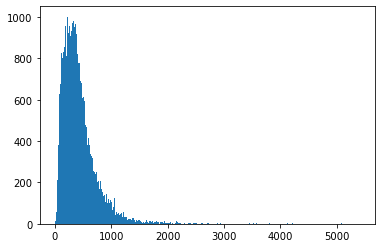

In [41]:
plt.hist(protein_length, bins=500)

### Let's caclulate the [Isoelectric Point](https://en.wikipedia.org/wiki/Isoelectric_point) for all proteins 

The isoelectric point is the pH at which a peptide sequence has no charge.

We will makes use of the [SeqUtils](https://biopython.org/DIST/docs/api/Bio.SeqUtils-module.html) using a specific dog idea (aka Class) called [IsoelectricPoint](https://biopython.org/DIST/docs/api/Bio.SeqUtils.IsoelectricPoint.IsoelectricPoint-class.html) to make these computations easier.

In [42]:
from Bio.SeqUtils import IsoelectricPoint as IP

In [43]:
?IP

In [44]:
#### third_protein
third_protein.seq

Seq('MAASEHRCVGCGFRVKSLFIQYSPGNIRLMKCGNCKEVADEYIECERMIIFIDL...IP*')

In [45]:
protein = IP.IsoelectricPoint(third_protein.seq)

In [46]:
protein

...it's like a sequnce dog...

In [48]:
###calculate the pi
protein.pi()

8.795695686340334

In [49]:
####calculate the charge at a certain 
protein.charge_at_pH(10)

-11.380127563471437

### Exercise VII

* Let's make a list of all the pi values of all proteins.
* Plot the pi distribution of all proteins in Arabidopsis.
* Explain the observed distribution

In [50]:
#### Faded example
protein_pi_values = []
for protein in arabidopsis_proteins:
    tmp_protein = IP.IsoelectricPoint(protein.seq)
    tmp_protein_pi = tmp_protein.pi()
    protein_pi_values.append(tmp_protein_pi)

Text(0.5, 0, 'pi [pH]')

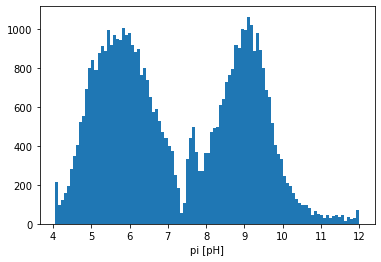

In [51]:
#### Plot the distribution of pi values of all arabidopsis proteins
plt.hist(protein_pi_values, bins = 100)
plt.xlabel('pi [pH]')

### Exercise VIII

* look at the relationship between protein length and pI values



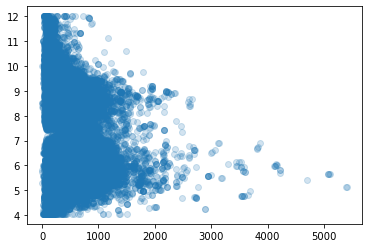

In [52]:
plt.scatter(protein_length, protein_pi_values, alpha=0.2)

The problem here is that too many points are overlapping and we would need to do some summary statistics while plotting.

### Seaborn to the rescue!

Let's do some density plots looking at both [distributions](https://seaborn.pydata.org/tutorial/distributions.html) at once.

In [53]:
import seaborn as sns

/Users/mcdonamc/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

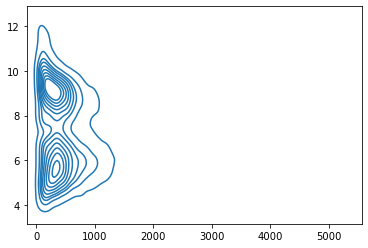

In [54]:
sns.kdeplot(protein_length, protein_pi_values)

/Users/mcdonamc/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


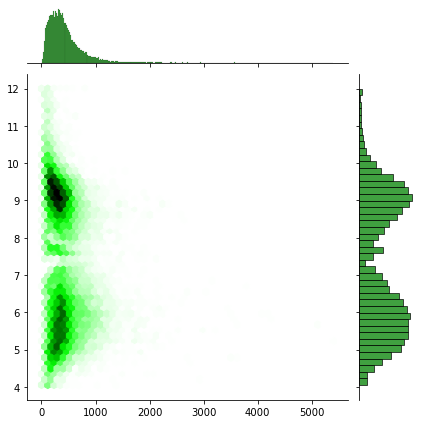

In [55]:
sns.jointplot(protein_length, protein_pi_values, kind='hex', color = 'g')